# HW4 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2020
#### Due : 7/01 (wednes)  11:59 PM [Through Black board]

## Assignment Credit

### Your assignments are 40% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 10%__
- __HW#3: 10%__
- __HW#4: 15%__

## Python Assingment HW4 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Problem1. Regression Model
## -Amzon stock price prediction.

### Problem 1-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [3]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv("./data/AMZN.csv")

# 0~5000번째 데이터만 사용해서 모델을 돌려보기로 한다
raw_data = raw_data[:5000]

In [4]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [5]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [6]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    
    # col_name : Variable to be used
    column_data = raw_data[col_name].values
    close_data = raw_data['Close'].values
    
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####
    
    for t in range(0, len(raw_data)-lookback):
        tmp_sample = []
        for offset in range(0, lookback):
            tmp_sample.append(column_data[t+offset])
        x_datas.append([tmp_sample])
        
        y_datas.append(close_data[t+lookback])        
    
   ##########################    

    x_data = np.concatenate(x_datas, 0)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [7]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_datas

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_datas\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [8]:
def split_datas(x,y):
    ##### Your Code Here ####
    num_test = 60
    num_total = len(x)

    x_train = x[:num_total - num_test]
    x_test = x[num_total - num_test:]

    y_train = y[:num_total - num_test]
    y_test = y[num_total - num_test:]
    ###########################
    return x_train, x_test, y_train, y_test

### <br/>Problem 1-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [9]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_datas(x, y)

    ##### Your Code Here ####
    poly = PolynomialFeatures(poly_degree)
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
        
    print("number of feature : ", len(X_train[0]))
    
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    ########################
    
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(X_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(X_test), y_test))
  
    return test_pred, y_test

In [12]:
# 바로 위의 함수의 경우, 모든 MSE 를 다 출력했다.
# 이 함수의 경우, train MSE 값이 6보다 작은 경우만 출력하도록 하기 위함

def run_regression2(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_datas(x, y)

    ##### Your Code Here ####
    poly = PolynomialFeatures(poly_degree)
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
        
    print("number of feature : ", len(X_train[0]))
    
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    ########################
    
    if mean_squared_error(model.predict(X_train), y_train)<6 :
        print ("MSE - Train %.4f"%mean_squared_error(model.predict(X_train), y_train))
        print ("MSE - Test %.4f"%mean_squared_error(model.predict(X_test), y_test))
  
    return test_pred, y_test

In [13]:
# 모든 column, lookback, poly_degree 에 대한 값들을 기록 (오버피팅, 언더피팅 비교를 위해)

lookback_list = list(range(20, 0, -1))
poly_degree_list = [3, 2, 1]
column_name_list = ['Open', 'Close', 'High', 'Low']


for k in range(0, len(column_name_list)):
    print("# column_name : ", column_name_list[k], " #\n")
    for j in range(0,len(poly_degree_list)):
        for i in range(0, len(lookback_list)):    
            print("lookback_days : ", lookback_list[i])
            print("poly_degree : ", poly_degree_list[j])
            test_pred, y_test = run_regression(raw_data, column_name=column_name_list[k], lookback_days=lookback_list[i], poly_degree=poly_degree_list[j])
            print()

# column_name :  Open  #

lookback_days :  20
poly_degree :  3
number of feature :  1771
MSE - Train 5.0366
MSE - Test 11947.7595

lookback_days :  19
poly_degree :  3
number of feature :  1540
MSE - Train 6.2265
MSE - Test 7347.8606

lookback_days :  18
poly_degree :  3
number of feature :  1330
MSE - Train 7.7091
MSE - Test 5692.0034

lookback_days :  17
poly_degree :  3
number of feature :  1140
MSE - Train 9.1030
MSE - Test 2862.1608

lookback_days :  16
poly_degree :  3
number of feature :  969
MSE - Train 10.7836
MSE - Test 1858.9385

lookback_days :  15
poly_degree :  3
number of feature :  816
MSE - Train 12.3711
MSE - Test 1460.1045

lookback_days :  14
poly_degree :  3
number of feature :  680
MSE - Train 14.7414
MSE - Test 835.0308

lookback_days :  13
poly_degree :  3
number of feature :  560
MSE - Train 16.7493
MSE - Test 416.9231

lookback_days :  12
poly_degree :  3
number of feature :  455
MSE - Train 18.7712
MSE - Test 323.8488

lookback_days :  11
poly_degree :  3
num

number of feature :  231
MSE - Train 16.0182
MSE - Test 74.8642

lookback_days :  19
poly_degree :  2
number of feature :  210
MSE - Train 16.2686
MSE - Test 72.1981

lookback_days :  18
poly_degree :  2
number of feature :  190
MSE - Train 16.7018
MSE - Test 70.5630

lookback_days :  17
poly_degree :  2
number of feature :  171
MSE - Train 17.1532
MSE - Test 67.0249

lookback_days :  16
poly_degree :  2
number of feature :  153
MSE - Train 17.4358
MSE - Test 62.1727

lookback_days :  15
poly_degree :  2
number of feature :  136
MSE - Train 17.6028
MSE - Test 61.3187

lookback_days :  14
poly_degree :  2
number of feature :  120
MSE - Train 17.9556
MSE - Test 61.9097

lookback_days :  13
poly_degree :  2
number of feature :  105
MSE - Train 18.1076
MSE - Test 66.0983

lookback_days :  12
poly_degree :  2
number of feature :  91
MSE - Train 18.5760
MSE - Test 64.1756

lookback_days :  11
poly_degree :  2
number of feature :  78
MSE - Train 18.9026
MSE - Test 65.4363

lookback_days :  10

number of feature :  19
MSE - Train 25.5181
MSE - Test 96.5015

lookback_days :  17
poly_degree :  1
number of feature :  18
MSE - Train 25.5151
MSE - Test 96.6376

lookback_days :  16
poly_degree :  1
number of feature :  17
MSE - Train 25.5670
MSE - Test 96.4869

lookback_days :  15
poly_degree :  1
number of feature :  16
MSE - Train 25.5950
MSE - Test 97.4894

lookback_days :  14
poly_degree :  1
number of feature :  15
MSE - Train 25.5899
MSE - Test 97.5074

lookback_days :  13
poly_degree :  1
number of feature :  14
MSE - Train 25.5925
MSE - Test 97.8284

lookback_days :  12
poly_degree :  1
number of feature :  13
MSE - Train 25.6146
MSE - Test 97.0109

lookback_days :  11
poly_degree :  1
number of feature :  12
MSE - Train 25.6239
MSE - Test 96.6065

lookback_days :  10
poly_degree :  1
number of feature :  11
MSE - Train 25.6225
MSE - Test 96.6330

lookback_days :  9
poly_degree :  1
number of feature :  10
MSE - Train 25.6671
MSE - Test 96.2683

lookback_days :  8
poly_degr

In [14]:
# train_loss < 6 인 값을 출력하는 column, lookback, poly_degree 에 대한 값들만 기록 (오버피팅, 언더피팅 비교를 위해)

lookback_list = list(range(20, 0, -1))
poly_degree_list = [3, 2, 1]
column_name_list = ['Open', 'Close', 'High', 'Low']


for k in range(0, len(column_name_list)):
    print("# column_name : ", column_name_list[k], " #\n")
    for j in range(0,len(poly_degree_list)):
        for i in range(0, len(lookback_list)):    
            print("lookback_days : ", lookback_list[i])
            print("poly_degree : ", poly_degree_list[j])
            test_pred, y_test = run_regression2(raw_data, column_name=column_name_list[k], lookback_days=lookback_list[i], poly_degree=poly_degree_list[j])
            print()

# column_name :  Open  #

lookback_days :  20
poly_degree :  3
number of feature :  1771
MSE - Train 5.0366
MSE - Test 11947.7595

lookback_days :  19
poly_degree :  3
number of feature :  1540

lookback_days :  18
poly_degree :  3
number of feature :  1330

lookback_days :  17
poly_degree :  3
number of feature :  1140

lookback_days :  16
poly_degree :  3
number of feature :  969

lookback_days :  15
poly_degree :  3
number of feature :  816

lookback_days :  14
poly_degree :  3
number of feature :  680

lookback_days :  13
poly_degree :  3
number of feature :  560

lookback_days :  12
poly_degree :  3
number of feature :  455

lookback_days :  11
poly_degree :  3
number of feature :  364

lookback_days :  10
poly_degree :  3
number of feature :  286

lookback_days :  9
poly_degree :  3
number of feature :  220

lookback_days :  8
poly_degree :  3
number of feature :  165

lookback_days :  7
poly_degree :  3
number of feature :  120

lookback_days :  6
poly_degree :  3
number of feat

number of feature :  680

lookback_days :  13
poly_degree :  3
number of feature :  560

lookback_days :  12
poly_degree :  3
number of feature :  455

lookback_days :  11
poly_degree :  3
number of feature :  364

lookback_days :  10
poly_degree :  3
number of feature :  286

lookback_days :  9
poly_degree :  3
number of feature :  220

lookback_days :  8
poly_degree :  3
number of feature :  165

lookback_days :  7
poly_degree :  3
number of feature :  120

lookback_days :  6
poly_degree :  3
number of feature :  84

lookback_days :  5
poly_degree :  3
number of feature :  56

lookback_days :  4
poly_degree :  3
number of feature :  35

lookback_days :  3
poly_degree :  3
number of feature :  20

lookback_days :  2
poly_degree :  3
number of feature :  10

lookback_days :  1
poly_degree :  3
number of feature :  4

lookback_days :  20
poly_degree :  2
number of feature :  231

lookback_days :  19
poly_degree :  2
number of feature :  210

lookback_days :  18
poly_degree :  2
number o

# train_loss < 6 을 갖는 파라미터들 모음

# Open #
lookback_days :  20<br/>
poly_degree :  3<br/>
number of feature :  1771<br/>
MSE - Train 5.0366<br/>
MSE - Test 11947.7595<br/>

# Close #
lookback_days :  20<br/>
poly_degree :  3<br/>
number of feature :  1771<br/>
MSE - Train 3.0303<br/>
MSE - Test 6433.4080<br/>
<br/>
lookback_days :  19<br/>
poly_degree :  3<br/>
number of feature :  1540<br/>
MSE - Train 3.8438<br/>
MSE - Test 3511.6066<br/>
<br/>
lookback_days :  18<br/>
poly_degree :  3<br/>
number of feature :  1330<br/>
MSE - Train 4.8754<br/>
MSE - Test 2110.8758<br/>
<br/>

lookback_days :  17<br/>
poly_degree :  3<br/>
number of feature :  1140<br/>
MSE - Train 5.8629<br/>
MSE - Test 856.0980<br/>

# High #
lookback_days :  20<br/>
poly_degree :  3<br/>
number of feature :  1771<br/>
MSE - Train 3.8506<br/>
MSE - Test 10923.2917<br/>
<br/>
lookback_days :  19<br/>
poly_degree :  3<br/>
number of feature :  1540<br/>
MSE - Train 4.7964<br/>
MSE - Test 6574.2540<br/>

# Low  #

lookback_days :  20<br/>
poly_degree :  3<br/>
number of feature :  1771<br/>
MSE - Train 3.8269<br/>
MSE - Test 7777.0186<br/>
<br/>
lookback_days :  19<br/>
poly_degree :  3<br/>
number of feature :  1540<br/>
MSE - Train 4.9126<br/>
MSE - Test 3619.6175<br/>



# Write Combination that you've found. (Train loss lower than 6) 
Variable : Close      <br/>
Lookback : 17      <br/>
Poly_degree : 3      <br/>

lookback_days :  17  <br/>
poly_degree :  3  <br/>
number of feature :  1140  <br/>
MSE - Train 5.8629  <br/>
MSE - Test 856.0980  <br/>
- train_loss 값이 6 미만인 값들 중에서, test_loss 값이 가장 작은 case였다

### Problem 1-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

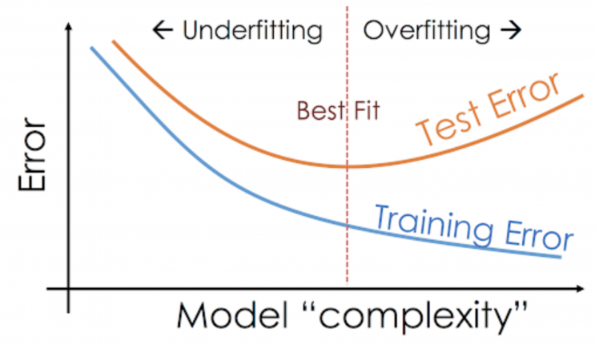

In [41]:
from IPython.display import Image
Image(filename='캡처.png')

# 1번
1) overfitting (=high variance)
- 정의 : model이 train data에 과하게 학습하여, test data에 대한 오차가 증가하는 현상
- 이 현상이 일어나는 경우 : train data를 설명하려고 도입하는 파라미터가 지나치게 많으며, 각 파라미터에 대응되는 feature 갯수도 과하게 많다. 

2) underfitting (=high bias)
- 정의 : model이 train data를 너무 적게 학습하여, train data 오차와 test data에 대한 오차가 높게 나타나는 현상
- 이 현상이 일어나는 경우 : train data를 설명하려고 도입하는 파라미터가 지나치게 적으며, 각 파라미터에 대응되는 feature 갯수도 적다.

3) 적용 
- 1번에서 feature 갯수를 결정짓는건, lookback과 Poly_degree 하이퍼파라미터다. 
- Poly_degree 관련 연산을 하지 않고 lookback 연산만 했더라면 feature 갯수는 lookback 파라미터 값에 비례하게 증가했을테지만, Poly_degree 관련 연산을 적용했기 때문에 Poly_degree 값에 거의 exponential하게 증가하게 된다. 즉, feature 갯수는 lookback의 영향보다 Poly_degree 값이 더 큰 영향을 받는다.
- 'Low' 컬럼을 예로 들자면, (언더피팅)
    - lookback_days=4, poly_degree=1 (총 feature=5개) : train_loss=25.1373, test_loss=75.8806
    - lookback_days=3, poly_degree=1 (총 feature=4개) : train_loss=25.2088, test_loss=76.5357
    - lookback_days=2, poly_degree=1 (총 feature=3개) : train_loss=25.2562, test_loss=77.4870
    - lookback_days=1, poly_degree=1 (총 feature=2개) : train_loss=25.3323, test_loss=78.8130
        > lookback_days=1, poly_degree=1 인 부분으로 갈수록 train_loss 와 test_loss 둘 다 증가        
        > 즉, feature 갯수가 줄어들면서 train_loss는 증가, test_loss 도 증가하고 있으므로,underfitting이 일어나는 방향이라고 볼 수 있다(=high bias)
- 'Close' 컬럼을 예로 들자면, (오버피팅)    
    - lookback_days : 20, poly_degree : 3 (총 feature=1771개) : train_loss=3.0303, test_loss=6433.4080
    - lookback_days : 19, poly_degree : 3 (총 feature=1540개) : train_loss=3.8438, test_loss=3511.6066
    - lookback_days : 18, poly_degree : 3 (총 feature=1330개) : train_loss=4.8754, test_loss=2110.8758
    - lookback_days : 17, poly_degree : 3 (총 feature=1140개) : train_loss=5.8629, test_loss=856.0980
        > lookback=20, poly_degree=3 인 부분으로 갈수록 train_loss는 감소하지만 test_loss가 증가하고 있다
        > 즉, feature 갯수가 늘어나면서 train_loss는 감소, test_loss 는 증가하고 있으므로 오버피팅이 일어나는 방향이라고 볼 수 있다(=high variance)

# 2번
- train_loss 가 6을 넘지 않도록 하는 하이퍼파라미터(lookback, poly_degree)를 구하라고 했다.
- 그러나 train_loss 가 6보다 작은 하이퍼파라미터를 기준으로 (ex. column='Close', lookback=20, poly_degree=3) 주변의 다른 하이퍼파라미터를 본다면 
    - lookback_days :  20, poly_degree :  3 (=number of feature :  1771)
        - train_loss=3.0303, test_loss=6433.4080
    - lookback_days :  19, poly_degree :  3 (=number of feature :  1540)
        - train_loss=3.8438, test_loss=3511.6066
    - lookback_days :  18, poly_degree :  3 (=number of feature :  1330)
        - train_loss=4.8754, test_loss=2110.8758
    - lookback_days :  17, poly_degree :  3 (=number of feature :  1330)
        - train_loss=5.8629, test_loss=856.0980
    > train_loss 값을 5.8629에서 3.0303으로 줄이기 위해 lookback 값을 증가시키고 있다.
    > 그러나, train_loss는 줄였어도, test_loss 는 오히려 큰 폭으로 증가했음을 알 수 있다.(856.0980 -> 6433.4080)
- 내가 model을 train 하는 이유는 결국 train때 사용하지 않았던 data, 즉 test data에 대해 올바른 prediction을 하고, 이에 대한 loss 인 test_loss 값을 최소로 만들 수 있도록 하기 위함이다.
- 결국, train_loss만을 줄이려고 하다보면 원래 목적인 test_loss의 최소화를 놓칠 수 있게 된다. 
- 그런 면에서, train_loss만을 최소화 할 수 있는 파라미터 lookback, poly_degree를 찾는 과정은 모델 학습의 관점에서 봤을때, 잘못된 방식이라고 할 수 있다.
- 하이퍼파라미터를 결정하는 올바른 방법은, feature 갯수가 증가함에 따라, test_loss 값이 감소하다 증가하는 지점을 찾는 것이다(=극소 지점). 그 지점을 기점으로 오버피팅이 일어난다고 생각할 수 있기 때문에, 최적의 하이퍼 파라미터는 이 지점의 근방에서 설정하는 것이 좋다.

### Problem 1-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [18]:
# TODO : Assign your best prediction for test data to best_pred
best_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=7, poly_degree=2)

MSE - Train 19.9709
MSE - Test 62.1908


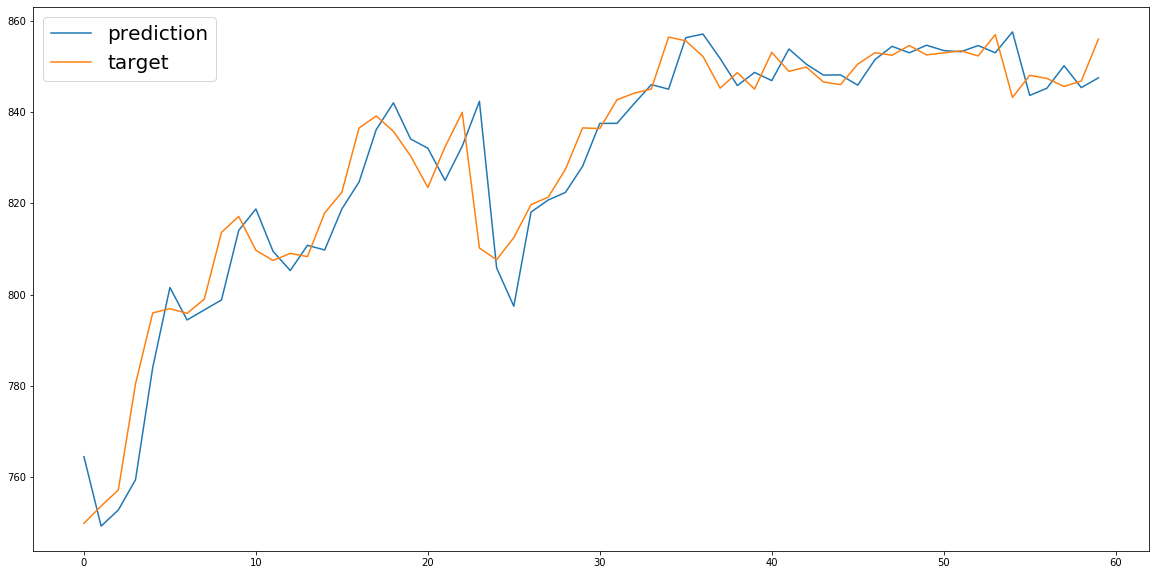

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem2. Regression Model
## -Covid Confirmed prediction.

In [18]:
country_dict = {'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burma': 27,
 'Burundi': 28,
 'Cabo Verde': 29,
 'Cambodia': 30,
 'Cameroon': 31,
 'Canada': 32,
 'Central African Republic': 33,
 'Chad': 34,
 'Chile': 35,
 'China': 36,
 'Colombia': 37,
 'Congo (Brazzaville)': 38,
 'Congo (Kinshasa)': 39,
 'Costa Rica': 40,
 "Cote d'Ivoire": 41,
 'Croatia': 42,
 'Cuba': 43,
 'Cyprus': 44,
 'Czechia': 45,
 'Denmark': 46,
 'Diamond Princess': 47,
 'Djibouti': 48,
 'Dominica': 49,
 'Dominican Republic': 50,
 'Ecuador': 51,
 'Egypt': 52,
 'El Salvador': 53,
 'Equatorial Guinea': 54,
 'Eritrea': 55,
 'Estonia': 56,
 'Eswatini': 57,
 'Ethiopia': 58,
 'Fiji': 59,
 'Finland': 60,
 'France': 61,
 'Gabon': 62,
 'Gambia': 63,
 'Georgia': 64,
 'Germany': 65,
 'Ghana': 66,
 'Greece': 67,
 'Grenada': 68,
 'Guatemala': 69,
 'Guinea': 70,
 'Guinea-Bissau': 71,
 'Guyana': 72,
 'Haiti': 73,
 'Holy See': 74,
 'Honduras': 75,
 'Hungary': 76,
 'Iceland': 77,
 'India': 78,
 'Indonesia': 79,
 'Iran': 80,
 'Iraq': 81,
 'Ireland': 82,
 'Israel': 83,
 'Italy': 84,
 'Jamaica': 85,
 'Japan': 86,
 'Jordan': 87,
 'Kazakhstan': 88,
 'Kenya': 89,
 'Korea, South': 90,
 'Kosovo': 91,
 'Kuwait': 92,
 'Kyrgyzstan': 93,
 'Laos': 94,
 'Latvia': 95,
 'Lebanon': 96,
 'Liberia': 97,
 'Libya': 98,
 'Liechtenstein': 99,
 'Lithuania': 100,
 'Luxembourg': 101,
 'MS Zaandam': 102,
 'Madagascar': 103,
 'Malawi': 104,
 'Malaysia': 105,
 'Maldives': 106,
 'Mali': 107,
 'Malta': 108,
 'Mauritania': 109,
 'Mauritius': 110,
 'Mexico': 111,
 'Moldova': 112,
 'Monaco': 113,
 'Mongolia': 114,
 'Montenegro': 115,
 'Morocco': 116,
 'Mozambique': 117,
 'Namibia': 118,
 'Nepal': 119,
 'Netherlands': 120,
 'New Zealand': 121,
 'Nicaragua': 122,
 'Niger': 123,
 'Nigeria': 124,
 'North Macedonia': 125,
 'Norway': 126,
 'Oman': 127,
 'Pakistan': 128,
 'Panama': 129,
 'Papua New Guinea': 130,
 'Paraguay': 131,
 'Peru': 132,
 'Philippines': 133,
 'Poland': 134,
 'Portugal': 135,
 'Qatar': 136,
 'Romania': 137,
 'Russia': 138,
 'Rwanda': 139,
 'Saint Kitts and Nevis': 140,
 'Saint Lucia': 141,
 'Saint Vincent and the Grenadines': 142,
 'San Marino': 143,
 'Sao Tome and Principe': 144,
 'Saudi Arabia': 145,
 'Senegal': 146,
 'Serbia': 147,
 'Seychelles': 148,
 'Sierra Leone': 149,
 'Singapore': 150,
 'Slovakia': 151,
 'Slovenia': 152,
 'Somalia': 153,
 'South Africa': 154,
 'South Sudan': 155,
 'Spain': 156,
 'Sri Lanka': 157,
 'Sudan': 158,
 'Suriname': 159,
 'Sweden': 160,
 'Switzerland': 161,
 'Syria': 162,
 'Taiwan*': 163,
 'Tanzania': 164,
 'Thailand': 165,
 'Timor-Leste': 166,
 'Togo': 167,
 'Trinidad and Tobago': 168,
 'Tunisia': 169,
 'Turkey': 170,
 'US': 171,
 'Uganda': 172,
 'Ukraine': 173,
 'United Arab Emirates': 174,
 'United Kingdom': 175,
 'Uruguay': 176,
 'Uzbekistan': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'West Bank and Gaza': 180,
 'Western Sahara': 181,
 'Zambia': 182,
 'Zimbabwe': 183}

In [19]:
#import covidall dataset 
import pandas as pd
train = pd.read_csv('data/train.csv')
all_data = pd.read_csv('data/covid_all.csv') #set your working directory
all_data

,Unnamed: 0,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,...,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,35677,13454,-1.0,83,183,2020-05-10,0.0,0.0,13455.0,109,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35678,35678,13455,-1.0,83,183,2020-05-11,0.0,0.0,13456.0,110,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35679,35679,13456,-1.0,83,183,2020-05-12,0.0,0.0,13457.0,111,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35680,35680,13457,-1.0,83,183,2020-05-13,0.0,0.0,13458.0,112,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0


In [20]:
print(all_data[all_data['Country_Region']==80])

       Unnamed: 0  index       Id  Province_State  Country_Region        Date  \
10082       10082  16330  16331.0              83              80  2020-01-22   
10083       10083  16331  16332.0              83              80  2020-01-23   
10084       10084  16332  16333.0              83              80  2020-01-24   
10085       10085  16333  16334.0              83              80  2020-01-25   
10086       10086  16334  16335.0              83              80  2020-01-26   
...           ...    ...      ...             ...             ...         ...   
28367       28367   6144     -1.0              83              80  2020-05-10   
28368       28368   6145     -1.0              83              80  2020-05-11   
28369       28369   6146     -1.0              83              80  2020-05-12   
28370       28370   6147     -1.0              83              80  2020-05-13   
28371       28371   6148     -1.0              83              80  2020-05-14   

       ConfirmedCases  Fata

### <br/>Problem 2-1 Plot ' Spain' covid-Confiremedcases graph between march 1 to march 11.
- your completed graph doesn't have to be the same as the example.

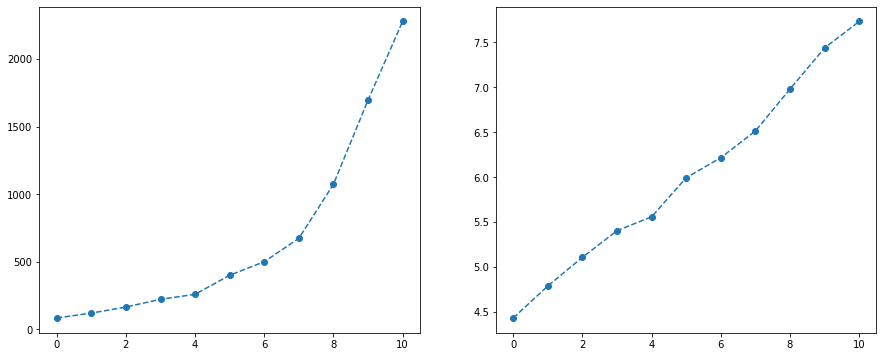

In [21]:
# plot 'Spain' covid-Confiremedcases graph between march 1 to march 11.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

###To do####  
spain = all_data.loc[all_data['Country_Region']==156].set_index('Date')
spain = spain['2020-03-01':'2020-03-11']
spain_y = spain['ConfirmedCases']

## To do ###
##apply log transform to y variables ## 
spain_logy = np.log(spain_y)

ax1.plot(np.arange(11), spain_y, 'o--')
ax2.plot(np.arange(11), spain_logy, 'o--')

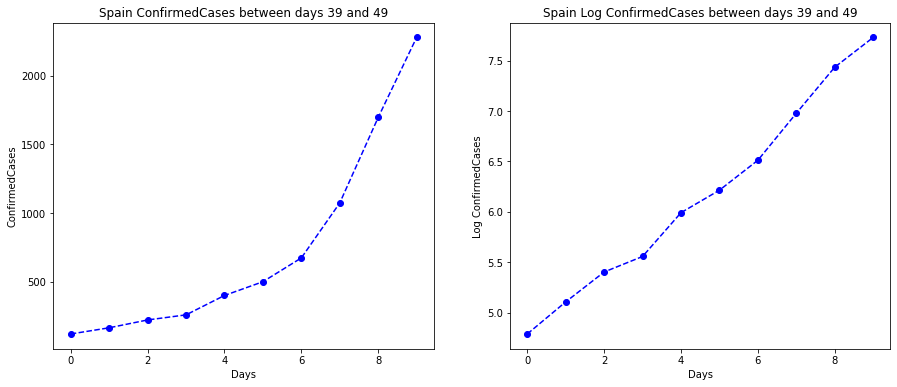

In [22]:
##don`t touch this cell##

# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]


In [23]:

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)


### <br/>Problem 2-2  complete below function to  Split data into train/test and apply linear regression

In [24]:
#  Split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]
    
    ##To do ## for Train set 
    x_train = df[df['Day_num']<=train_lim]     
    y_train_1 = x_train['ConfirmedCases'].values
    y_train_2 = x_train['Fatalities'].values
    
    x_train.drop('ConfirmedCases', inplace=True, errors='ignore', axis=1)
    x_train.drop('Fatalities', inplace=True, errors='ignore', axis=1)
    
    ##To do ## for  Test set
    x_test =  df[train_lim < df['Day_num']]    
    
    x_test.drop('ConfirmedCases', inplace=True, errors='ignore', axis=1)
    x_test.drop('Fatalities', inplace=True, errors='ignore', axis=1)
        
    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test #check to devide y_dataset 


# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    
    ##To do ##   Create linear regression object
    regr = linear_model.LinearRegression()
    
    ## To do ##  Train the model using the training sets
    regr.fit(X_train, Y_train)

    # To do ## Make predictions using the testing set
    y_pred = regr.predict(X_test)
        
    return regr, y_pred

In [25]:
##don`t touch this cell##
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14','2020-05-15']
def plot_linreg_basic_country(data, country_name, dates_list, day_start, shift, train_lim, test_lim):
    
    data_country = data[data['Country_Region']==country_dict[country_name]]    
    data_country = data_country.loc[data_country['Day_num']>=day_start]
    X_train, Y_train_1, Y_train_2, X_test = split_data(data_country, train_lim, test_lim)
        
    model, pred = lin_reg(X_train, Y_train_1, X_test)
        
    # Create a df with both real cases and predictions (predictions starting on March 12th)
    X_train_check = X_train.copy()
    X_train_check['Target'] = Y_train_1

    X_test_check = X_test.copy()
    X_test_check['Target'] = pred

    X_final_check = pd.concat([X_train_check, X_test_check])

    # Select predictions from March 1st to March 25th
    predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
    real_data = train.loc[(train['Country_Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.expm1(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (from March " + str(1+shift) + " to March 25th)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log1p(real_data))
    ax2.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (from March " + str(1+shift) + " to March 30th)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Log-Lineal Regression for "+country_name))

### <br/>Problem 2-3  using above function'plot_linreg_basic_country' run the Linear Regression workflow to Korea, South case
 - your completed graph doesn't have to be the same as the example.


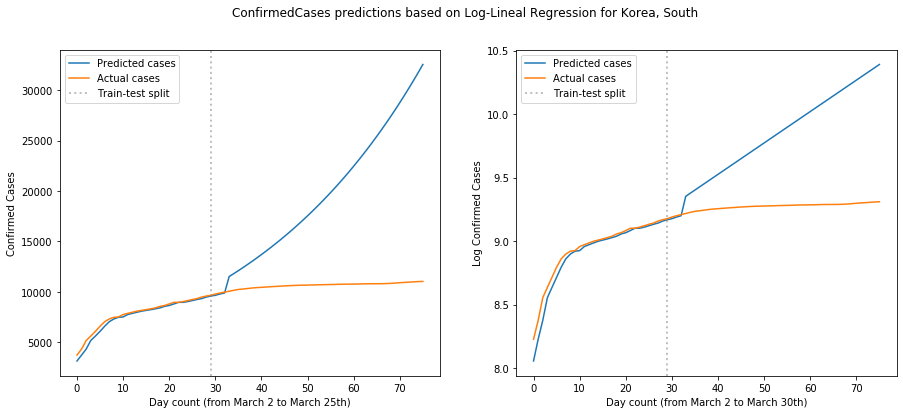

In [37]:
march_day = 1
plot_linreg_basic_country(data=data, country_name='Korea, South', dates_list = dates_list[:], day_start=38, shift = march_day, train_lim=70, test_lim=113)

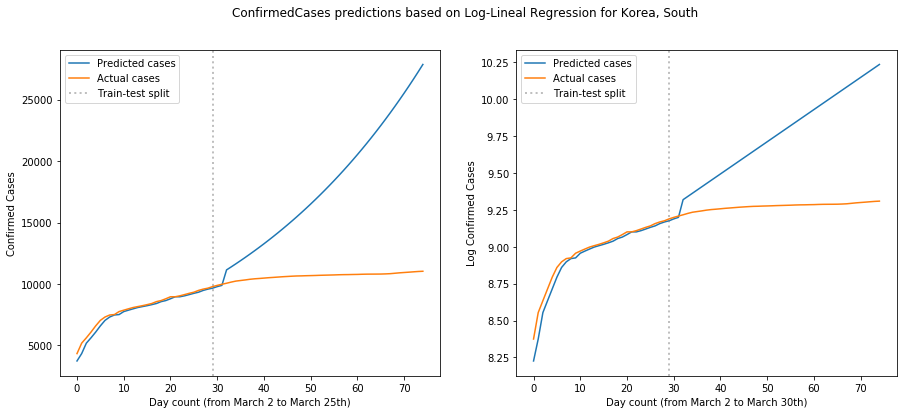

### <br/>Problem 2-4 Describe the significance and limitations of the graph above.

### YOUR ANSWER HERE ###

0. 1번 문제와 마찬가지로, 시계열 문제를 다루고 있다. 1번에서는, 하나의 컬럼을 선택해서 lookback을 이용해 시간의 흐름을 내포한 인풋을 만든 반면, 2번에서는 특정 시간 자체를 나타내는 변수 자체인 Day_num을 인풋 데이터에 담고 있다.
1. 예측을 위한 input 데이터를 보면, 총 3개의 컬럼만 취한다 ('Country_Region', 'Province_State','Day_num'). 그러나, 이마저도 'Korea, South'라는 조건 하에 데이터를 뽑은 것이기 때문에 'Country_Region', 'Province_State' 두 컬럼은 결괏값에 영향을 거의 주지 않는다고 볼 수 있다 (모든 데이터들이 동일한 'Country_Region', 'Province_State' 값을 갖고 있기 때문)
2. 결국, 실질적으로는 'Day_num' 이라는 컬럼 하나만을 사용해서 y값을 예측하는 것인데, 이는 feature 갯수가 너무 적기 때문에 y값(=실제값)을 충분히 설명하지 못하는 모델을 만들게 된다 (물론 실제 학습할때 'Country_Region', 'Province_State' 를 반영하여 학습하긴 한다. 단지, 데이터가 유의미한가에 대한 관점에서 따져 보는 것이다)
3. 그렇기에, 아무리 데이터를 학습해보더라도 실제 test_data를 도입하는 Day_count=30부터 prediction과 actual case 사이에서 오차가 급격하게 커지는 것을 볼 수 있다(1번째 그래프). y 값인 confirmed cases에 log연산을 취해봐도, 큰 오차를 갖게 되는건 변함 없다(2번째 그래프)
4. 따라서, 시계열 데이터를 분석하기 위해선 2번보다 1번의 방식이 더 합리적이고 정확한 결과를 도출할 수 있다는 것을 알 수 있다. 시간의 흐름을 담을 수 있도록, lookback 같은 방식을 적용해야 한다.

## 3. Caculating Stringency Indexes of six countries 

Reference : https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Look at the document above and learn about Stringency Index (not legacy stringency index!!)

## 3-1 Data filtering

In [43]:
#load csv file you care ("OxCGRT_latest.csv")
###YOUR CODE HERE###
oxcgrt_latest = pd.read_csv('./data/OxCGRT_latest.csv')

In [44]:
oxcgrt_latest

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22177,Kosovo,RKS,20200509,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,1.0,0.0,0.0,NaN,862.0,28.0,94.71,94.71,93.57,93.57
22178,Kosovo,RKS,20200510,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,1.0,0.0,0.0,NaN,870.0,28.0,94.71,94.71,93.57,93.57
22179,Kosovo,RKS,20200511,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,1.0,0.0,0.0,NaN,884.0,28.0,94.71,94.71,93.57,93.57
22180,Kosovo,RKS,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,919.0,29.0,NaN,94.71,NaN,93.57


In [45]:
#Filter rows with six unique countries by 'CountryName'
#('CountryName' == Australia, China, Japan, New Zealand, Singapore, South Korea)
###YOUR CODE HERE###
filter_oxcgrt = oxcgrt_latest[(oxcgrt_latest.CountryName=='Australia')
                       |(oxcgrt_latest.CountryName=='China')
                       |(oxcgrt_latest.CountryName=='Japan')
                       |(oxcgrt_latest.CountryName=='New Zealand')
                       |(oxcgrt_latest.CountryName=='Singapore')
                       |(oxcgrt_latest.CountryName=='South Korea')]

In [46]:
#Drop columns you don't need
#print dataframe you care about
###YOUR CODE HERE###
#use columns : 
"""
['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']
"""
filter_oxcgrt = filter_oxcgrt[['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']]


In [47]:
display(filter_oxcgrt)

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag
947,Australia,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
948,Australia,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
949,Australia,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
950,Australia,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
951,Australia,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17721,Singapore,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17722,Singapore,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17723,Singapore,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
print(len(filter_oxcgrt['C1_Flag']))
print(filter_oxcgrt['C1_Flag'].count())

813
407


In [49]:
list_flag = ['C1_Flag', 'C2_Flag', 'C3_Flag', 'C4_Flag','C5_Flag', 'C6_Flag', 'C7_Flag', 'H1_Flag']

for i in range(0, len(list_flag)):
    filter_oxcgrt[list_flag[i]] = filter_oxcgrt[list_flag[i]].fillna(0)

display(filter_oxcgrt)

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag
947,Australia,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948,Australia,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949,Australia,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,Australia,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,Australia,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
17721,Singapore,20200511,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
17722,Singapore,20200512,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
17723,Singapore,20200513,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0


## 3-2 Calculating Stringency Index

you can use some pakages to deal with 'nan' values

In [50]:
#stringency calculation
#step1 : calculate weight for a policy of general scope
###YOUR CODE HERE###

Nj = [-1,3,3,2,4,2,3,2,4,2]
sum = 0
for i in range(1, len(Nj)):
    if i!=8:        
        sum = sum + (1/(Nj[i]+1))
sum = sum/8

print(sum)
w = sum

0.28541666666666665


In [51]:
#step2 : calculate sub-indices
#calculate C1-C9, G1-G8, and I1-I9 
###YOUR CODE HERE###
def sub_indice(num_indicator, c, g):
    if num_indicator==8 :
        return 100*(c/Nj[num_indicator])
    else :
        return 100*(c*(1-w)/Nj[num_indicator]+w*g)

In [52]:
# stringency_index 를 만들때, filter_oxcgrt.iloc[0] 행에서 몇 번째 인덱스를 가져와야 할지 확인하기 위해 출력했습니다

display(filter_oxcgrt.iloc[0])
print(len(filter_oxcgrt.iloc[0]))
print("c1 : ", filter_oxcgrt.iloc[0, 2], " c1 flag: ", filter_oxcgrt.iloc[0, 3])
print("c2 : ", filter_oxcgrt.iloc[0, 4], " c2 flag: ", filter_oxcgrt.iloc[0, 5])
print("c3 : ", filter_oxcgrt.iloc[0, 6], " c3 flag: ", filter_oxcgrt.iloc[0, 7])
print("c4 : ", filter_oxcgrt.iloc[0, 8], " c4 flag: ", filter_oxcgrt.iloc[0, 9])
print("c5 : ", filter_oxcgrt.iloc[0, 10], " c5 flag: ", filter_oxcgrt.iloc[0, 11])
print("c6 : ", filter_oxcgrt.iloc[0, 12], " c6 flag: ", filter_oxcgrt.iloc[0, 13])
print("c7 : ", filter_oxcgrt.iloc[0, 14], " c7 flag: ", filter_oxcgrt.iloc[0, 15])
print("c8 : ", filter_oxcgrt.iloc[0, 16])
print("h1 : ", filter_oxcgrt.iloc[0, 17], " h1 flag: ", filter_oxcgrt.iloc[0, 18])

CountryName                             Australia
Date                                     20200101
C1_School closing                               0
C1_Flag                                         0
C2_Workplace closing                            0
C2_Flag                                         0
C3_Cancel public events                         0
C3_Flag                                         0
C4_Restrictions on gatherings                   0
C4_Flag                                         0
C5_Close public transport                       0
C5_Flag                                         0
C6_Stay at home requirements                    0
C6_Flag                                         0
C7_Restrictions on internal movement            0
C7_Flag                                         0
C8_International travel controls                0
H1_Public information campaigns                 0
H1_Flag                                         0
Name: 947, dtype: object

19
c1 :  0.0  c1 flag:  0.0
c2 :  0.0  c2 flag:  0.0
c3 :  0.0  c3 flag:  0.0
c4 :  0.0  c4 flag:  0.0
c5 :  0.0  c5 flag:  0.0
c6 :  0.0  c6 flag:  0.0
c7 :  0.0  c7 flag:  0.0
c8 :  0.0
h1 :  0.0  h1 flag:  0.0


In [53]:
#step3 : calculate stringency index I (up to 2 decimal points)
###YOUR CODE HERE###

def strigency_index(data):
    stringency_idx = 0
    for i in range(1, 8):
        stringency_idx = stringency_idx + sub_indice(i,data[2*i], data[2*i+1])
    stringency_idx = stringency_idx + sub_indice(9,data[17], data[18])
    
    return round(stringency_idx/9,2)

In [54]:
#step4 : make your stingency index array into dataframe(column name = 'my_StringencyIndex') and concat it(axis = 1) to the result of 1-1 
###YOUR CODE HERE###

my_StringencyIndex = []
for i in range(0, len(filter_oxcgrt)):
    my_StringencyIndex.append(strigency_index(filter_oxcgrt.iloc[i]))

my_StringencyIndex = pd.DataFrame(my_StringencyIndex).rename(columns={0:"my_StringencyIndex"})
rst_oxcgrt = pd.concat([filter_oxcgrt, my_StringencyIndex], axis=1)

# 결과를 출력해봤습니다
display(my_StringencyIndex)

# 0, NaN 값이 너무 많아서 혹시 계산에 문제는 없는지 sum 을 해봤습니다. 
# NaN 은 계산에 반영되지 않기에, 만약 NaN, 0 이외의 값이 있다면 sum 값이 0보다는 큰 값이 나와야 합니다
print("sum of", my_StringencyIndex.sum())
display(my_StringencyIndex.isna().sum())

# 일부분만 발췌해서 계산이 잘 되었는지 확인해봤습니다
display(my_StringencyIndex[20:80])


,my_StringencyIndex
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
808,NaN
809,NaN
810,NaN
811,NaN


sum of my_StringencyIndex    27182.35
dtype: float64


my_StringencyIndex    32
dtype: int64

,my_StringencyIndex
20,0.00
21,0.00
22,0.00
23,0.00
24,7.94
25,7.94
26,7.94
27,7.94
28,7.94
29,7.94


In [56]:
# 총 결과 행렬입니다. 맨 오른쪽에 concat 했습니다
display(rst_oxcgrt)

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag,my_StringencyIndex
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN
17721,Singapore,20200511.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN
17722,Singapore,20200512.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN
17723,Singapore,20200513.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN


## Problem4. Topic Modeling (Clustering analysis of documents) for tweets related to COVID-19
A **topic model** is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.
 Please refer to [wikipedia](https://en.wikipedia.org/wiki/Topic_model#:~:text=In%20machine%20learning%20and%20natural,structures%20in%20a%20text%20body.) for detailed information.
- These documents were crawled from *twitter* with some *COVID-19* related keywords . All tweets are in English but have a lot of noisy information.
- In this problem, your goal is to cluster tweets according to the latent 'topics' with the statistical method, automatically. 


### Load the csv file using pandas library

In [21]:
df = pd.read_csv('./data/covid_twitter.csv') #set your working directory
text_en = df['text'].str.lower() # stopwords를 제거하기 편하게 하려고 소문자로 모두 변환해줬다
print(text_en)

0        .@patriceharrismd spoke with @yahoofinance abo...
1        #coronaupdate | johns hopkins university has s...
2        singapore donates 40,000 test kits to the phil...
3        lockdowns, drones: will things ever go back to...
4        does the #covid19 pandemic have you feeling ou...
                               ...                        
36116    top public health officer says coming week a c...
36117    went for a run this evening...\ngod reminded m...
36118    trump ~ millions of face masks being made, tho...
36119    for many students in our state, #covid19 closu...
36120    will the #coronavirus pandemic of 2020 come to...
Name: text, Length: 36121, dtype: object


### Problem 4-1 Text Preprocessing
First of all, you should process the documents so that the model will not be perturbed by the noisy information

**a. Remove the following characters with *'re'* module in each tweets**
- special characters ( # @ , . | ? ! )
- *COVID* relavant words (COVID19, coronavirus, coronaoutbreak)

In [22]:
### YOUR CODE HERE ###
import re

for i in range(0, len(text_en)):
    text_en[i]=re.sub('[#@,.|?!]|covid19|coronavirus|coronaoutbreak','', str(text_en[i]))

In [23]:
print(text_en)

0        patriceharrismd spoke with yahoofinance about ...
1        coronaupdate  johns hopkins university has sai...
2        singapore donates 40000 test kits to the phili...
3        lockdowns drones: will things ever go back to ...
4        does the  pandemic have you feeling out-of-con...
                               ...                        
36116    top public health officer says coming week a c...
36117    went for a run this evening\ngod reminded me t...
36118    trump ~ millions of face masks being made thou...
36119    for many students in our state  closures are i...
36120    will the  pandemic of 2020 come to be seen as ...
Name: text, Length: 36121, dtype: object


**b. Remove the *stop words* in each tweets**

*Stop words* are words which should be filtered out before given to the model. Please refer to [wikipedia](https://en.wikipedia.org/wiki/Stop_words#:~:text=In%20SEO%20terminology%2C%20stop%20words,save%20space%20in%20their%20databases.) for detailed information 
- First, you should download the stop word set from *nltk* module.

In [24]:
### NLP toolkit ###
import nltk
from nltk.corpus import stopwords

In [25]:
### Download the set with this
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tryot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
### check the set with this
stop_words = set(stopwords.words('english'))
print(stop_words)
print(len(stop_words))

{'or', 'm', 'itself', 'can', 'needn', "doesn't", 'an', 'we', 'been', 'were', 'be', 'he', 'was', 'their', 'between', 'has', 'shan', 'herself', 'should', 'couldn', 'my', 'didn', 'out', 'd', 'over', 'then', "shouldn't", "it's", 'all', 'from', 'mustn', 'during', 'how', 'him', 'once', 'have', 'do', 'same', 'his', 'who', "don't", "isn't", 'what', 'our', 'doing', 'again', 't', 'under', 'theirs', 'after', 'some', 'very', 're', 'here', "hasn't", 'such', "haven't", 'its', 'other', 'mightn', 'y', 'where', 'until', 'so', "wouldn't", 'did', 'yourself', 'am', 'ourselves', 'up', 'won', 'each', 'of', 'wouldn', 've', 'while', 'the', 'if', 'because', 'shouldn', 'there', 'she', 'into', 'nor', "hadn't", 'to', 'both', 'than', "mightn't", 'but', 'isn', 'just', 'aren', 'above', "shan't", 'why', 'don', 'which', "didn't", 'whom', "aren't", 'too', 'o', "weren't", 'those', 'ain', 'that', 'yours', 'before', 'no', "that'll", 'any', 'they', "she's", 'further', 'ours', 'll', 'me', 'and', 'by', 'with', 's', 'as', 'at

**a. Update your set with some stop words which are not needed for modeling, you think.**

In [27]:
!pip install stop_words

In [28]:
### YOUR CODE HERE ###
# 이미 stopword에 반영된 단어들이 충분해서, 추가적으로 필요한 stopword를 찾기 힘들었습니다.
# 그나마 상투적으로 쓰이는 말들이나, html 코드 일부분을 제거하기 위해 update 했습니다
stop_words.update(['amp', 'jerome', 'actually', 'said', 'coronaupdate', 'covid_19','covid'])

**b. Remove stop words from the tweet dataset with your own stop words set**

In [29]:
### YOUR CODE HERE ###
from nltk.tokenize import word_tokenize

total_filter=[]
for i in range(0, len(text_en)):
    tmp_token = word_tokenize(text_en[i])
    tmp_filter = ''
    for word in tmp_token:
        if word not in stop_words:
            tmp_filter += word
            tmp_filter += ' '
    total_filter.append(tmp_filter)

total_filter = pd.Series(total_filter)

In [30]:
total_filter

0        patriceharrismd spoke yahoofinance stimulus pa...
1        johns hopkins university authorize use logo re...
2           singapore donates 40000 test kits philippines 
3        lockdowns drones : things ever go back normal ...
4        pandemic feeling out-of-control overwhelmed ta...
                               ...                        
36116    top public health officer says coming week cru...
36117    went run evening god reminded matter happens d...
36118    trump ~ millions face masks made thousands ven...
36119    many students state closures impacting ability...
36120    pandemic 2020 come seen momentary interruption...
Length: 36121, dtype: object

### Problem 4-2 Convert the documents to a tf-idf matrix 
*TF-IDF* is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Please refer to [this](http://mlwiki.org/index.php/TF-IDF)
- Please use the results of 4-1
- First, transform your tweets dataset into tf-idf matrix using the module below
- Print your tf-idf matrix after converting it into *pandas.DataFrame* format
- Set your own hyperparams.

In [31]:
### scikit learn ###
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
### YOUR CODE HERE ###

tfidf = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 8000, stop_words = 'english')
tfidf.fit(total_filter)
text = tfidf.transform(total_filter)

### Problem 4-3 Cluster the tf-idf matrix of tweets using the *K-Means* algorithm.
- Set your own hyperparams

In [33]:
### scikit learn ###
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

**a. Find an optimal value for the number of clusters using the *elbow method***
- Draw the plot for SSD(Sum of the Squared Distance) of *K-Means* algorithm by the number of clusters, K, as shown in the example


Example
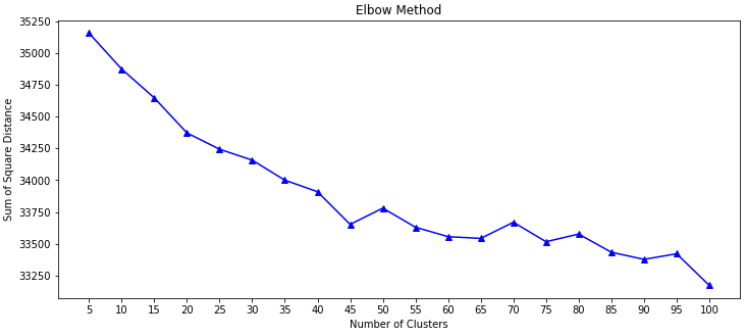

In [36]:
### YOUR CODE HERE ###
def iter_cluster(data, max_cluster):
    cluster_list = range(5, max_cluster+1, 5)
    
    sse = []
    for k in cluster_list:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print("cluster ",k, "finished")
        
    f, ax = plt.subplots(1, 1)
    ax.plot(cluster_list, sse, marker='^')
    ax.set_xlabel('Number of Clusters')
    ax.set_xticks(cluster_list)
    ax.set_xticklabels(cluster_list)
    ax.set_ylabel('Sum of Square Distance')
    ax.set_title('Elbow Method')

cluster  5 finished
cluster  10 finished
cluster  15 finished
cluster  20 finished
cluster  25 finished
cluster  30 finished
cluster  35 finished
cluster  40 finished
cluster  45 finished
cluster  50 finished
cluster  55 finished
cluster  60 finished
cluster  65 finished
cluster  70 finished
cluster  75 finished
cluster  80 finished
cluster  85 finished
cluster  90 finished


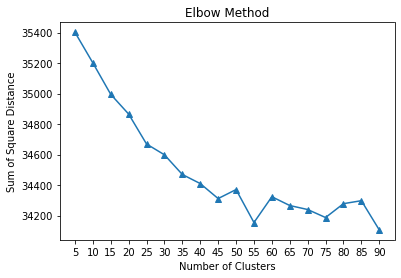

In [37]:
iter_cluster(text, 90)

**b. Based on the your plot above, pick a proper value for K and justify why.**

It is OK that you can't find any proper value for K. If not, specify why these are not proper.

**### YOUR DESCRIPTION HERE ###**
 
 

0. kmeans clustering 기법을 적용할 때, 적절한 k 값을 선택하기 위해 보통 여러 개의 k값들을 적용해서 총 loss 값들의 추이를 살펴보고, elbow 부분을 띄고 있는 지점을 찾아서, 해당 부위의 k 값을 최적의 cluster 갯수로 판단한다.
1. 그림을 보면, k=30 부분을 기준으로 loss 값의 감소 폭이 크게 줄어들었음을 알 수 있다. 전체 그래프를 놓고 봤을때, 이는 elbow 부분에 해당한다. 
2. 비록 이 부분이 가장 작은 loss 값을 보이는 것은 아니더라도, k 값이 과하게 클 경우 loss 값 자체는 작아지더라도, 유의미한 clustering은 할 수 없기에 elbow 부분의 cluster 갯수를 사용하는 것이다.
3. 따라서, 위 그래프 상으로는 k=30 가 적절한 cluster 갯수라고 할 수 있다.

### Problem 4-4 Visualize your clusters to evaluate the results of clustering analysis.

**a. Assgin the cluster index for each tweet with K=14**
- In other words, predict the label for each example

In [143]:
### YOUR CODE HERE ###
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

**b. Fill the function in below, which visualizes your clusters with PCA and TSNE**

Both *PCA* and *TSNE* are the most common visualization techniques in the machine learning community. It is usually known that TSNE could capture the non-linear relationship between datapoints than PCA. For more detailed information, please refer to [this](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
- At first, this function randomly selects some samples for fitting PCA, depending on your device's capability.
- Get the PCA matrices from the results of 4-2(tf-idf matrix) where the number of principal components is 2, each.
- If you are uncomfortable with this function, you can make your own function to accomplish the same goal with this.

Example
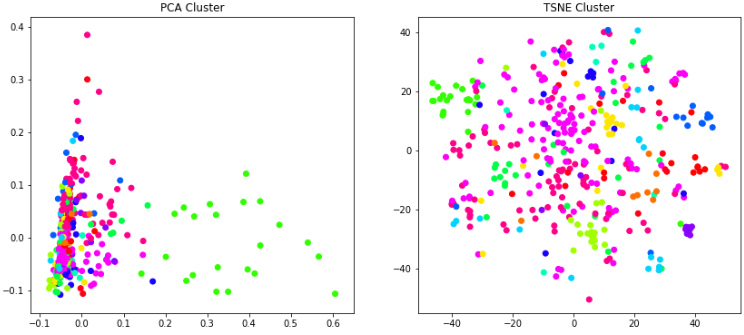

In [64]:
### visualization methods ###
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
### for plotting ###
import matplotlib.cm as cm

In [65]:
def plot_tsne_pca(data, labels):
    '''
    This function plots the PCA and t-SNE on 2D plane.
    args:
        data: tf-idf weight matrix
        labels: predictions from K-means
    '''
    # initial set up and random pick up samples
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    ######################## YOUR CODE HERE ########################
    '''
    pca (2000 x 2) : extract 2 eigenvectors that have the most explained variance
    tsne (2000 x 2) : feed the 50 principal components to t-SNE
                     For TSNE, you can use the TSNE().fit_transform() function.
    '''
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    #################################################################
    
    # random pick certain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    # plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')

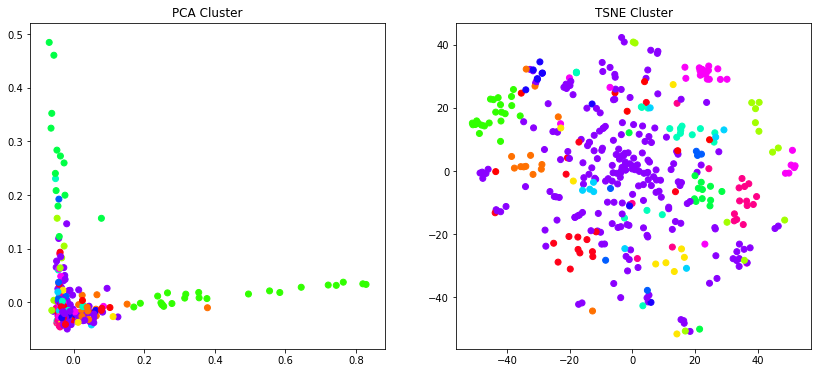

In [144]:
### YOUR CODE HERE ###
# plot PCA and t-SNE reduced data with above function
plot_tsne_pca(text, clusters)

### Problem 4-5 Extract keywords from each clusters

**a. get the top keywords from each cluster you've got from 4-4 (a.), based on the tf-idf matrix values**

- Use the function in below or make your own function to achieve the same goal with this function.

Example
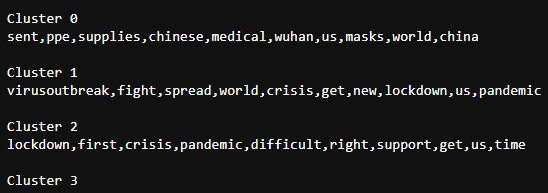

In [112]:
def get_top_keywords(data, clusters, labels, n_terms=10):
    '''
    This function displays the top keywords based on tf-idf score.
    data = tf-idf array
    clusters = assigned cluster index
    labels = vectorizer.get_feature_names()
    n_terms = top n keywords
    '''
    #  based on predictions
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # loop through each clusters and print top 10 score words
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [145]:
### YOUR CODE HERE ###
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
help,water,online,conference,soap,medical,wash,stop,hands,check

Cluster 1
people,travel,19,jersey,deaths,state,city,cases,york,new

Cluster 2
america,administration,china,ratings,april,guidelines,realdonaldtrump,donald,president,trump

Cluster 3
time,home,food,stayathomeandstaysafe,outbreak,uk,day,people,india,lockdown

Cluster 4
death,number,reports,bringing,reported,confirmed,new,deaths,total,cases

Cluster 5
lives,spread,save,help,staying,stayathomeandstaysafe,people,safe,home,stay

Cluster 6
workers,local,community,time,crisis,people,support,think,help,need

Cluster 7
health,people,china,medical,fund,donate,support,pandemic,help,fight

Cluster 8
symptoms,social,measures,people,stop,virus,prevent,help,slow,spread

Cluster 9
died,19,negative,testing,people,cases,tests,test,tested,positive

Cluster 10
day,like,today,crisis,world,china,19,time,outbreak,people

Cluster 11
coronalockdown,help,outbreak,19,quarantine,world,global,people,stayathomeandstaysafe,pandemic

Cluster 1

**b. According to the keywords selected from (a.), describe the differences between clusters or guess the topic of tweets in the specific cluster**

**### YOUR DESCRIPTION HERE ###**

- Cluster 0 : help,water,online,conference,soap,medical,wash,stop,hands,check
    - soap, wash hands water, (온도)check, help 같이, 예방을 위한 수칙이 등장
    - medical conference의 경우, 코로나 바이러스 예방 관련 내용을 공유하는 컨퍼런스일 것으로 추정
        > 코로나 바이러스를 예방하기 위한 수칙들을 설명하는 트윗
    
- Cluster 1 : people,travel,19,jersey,deaths,state,city,cases,york,new
    - 뉴욕, 뉴저지같은 미국 내 구체적 지역 이름 등장
    - death, cases같은 구체적 수치 등장
        > 미국 내 도시들의 확진자/사망자 수에 대한 트윗

- Cluster 2 : america,administration,china,ratings,april,guidelines,realdonaldtrump,donald,president,trump
    - 트럼프 대통령, america, administration 관련 용어들이 다수 등장
    - april, guidline, rating 등장하는 것으로 보아, 미국 정부가 코로나 바이러스 대응에 대한 가이드라인을 제시했으며, 4월쯤에 코로나 대응에 대한 여론을 알려주는 것으로 추정
        > 미국 대통령/정부의 코로나 대응 방식과, 그에 대한 여론을 나타내는 트윗

- Cluster 3 : time,home,food,stayathomeandstaysafe,outbreak,uk,day,people,india,lockdown
    - uk, india 라는 나라가 등장
    - lockdown(=폐쇄) 용어 등장
    - time, home, food, stayathomeandstaysafe 같은 용어가 등장하는 것으로 보아, 집에 머무르면서 사회적 활동을 자제하고 있다
        > UK, India 같은 나라에서 시행하고 있는 사회적 거리두기 활동(=집에서 생활)에 대한 트윗
    
- Cluster 4 : death,number,reports,bringing,reported,confirmed,new,deaths,total,cases
    - death, total cases, confirmed 단어들만 등장. cluster 1 과 유사하나, cluster 1에서는 미국 내 구체적 지역에서의 케이스를 언급하는 것으로 보아 이 경우와는 다른 것으로 추측. 전 세계적인 확진자/사망자 수와 관련있는 값이 아닐까 추측됨.
        > 전 세계적 확진자/사망자 수

- Cluster 5 :lives,spread,save,help,staying,stayathomeandstaysafe,people,safe,home,stay
    - time, home, food, stayathomeandstaysafe 같은 용어가 등장하는 것으로 보아, 집에 머무르면서 사회적 활동을 자제하는 중
    - Cluster 3 과 유사하나, cluster 3에서는 특정 국가가 등장하는 것으로 보아, cluster 5는 그와 다르게, 전 세계적인 사회적 거리두기 활동이라고 보여짐
        > 전 세계적으로 시행되고 있는 사회적 거리두기 활동(=집에서 생활)에 대한 트윗

- Cluster 6 : workers,local,community,time,crisis,people,support,think,help,need
    - workers, local, community 용어가 등장하는 것으로 보아, 직장을 갖고 있는 사람들에 대한 내용임을 추측
    - crisis 용어가 local, community와 함께 등장하는 것으로 보아, 직장인들의 실직으로 인한, 지역 사회의 경제 위기와 관련 있는 트윗일거라 추측
        > 코로나 바이러스로 인한 지역 경제 위기에 대한 트윗

- Cluster 7 : health,people,china,medical,fund,donate,support,pandemic,help,fight
    - fund, donate, help, support 용어가 등장
    - medical, fight 용어 등장
    - china 라는 국가 이름 등장
        > 중국에서 의료 활동을 하고 있는 사람들을 위한 재정 펀딩, 기부 등을 담고 있는 트윗

- Cluster 8 : symptoms,social,measures,people,stop,virus,prevent,help,slow,spread
    - symptoms 용어가 모든 cluster에서 유일하게 등장. 증상이 있는 사람들과 관련된 트윗일 것이라 추측
    - social, stop 같은, 사회적 활동 금지 관련 트윗일 것이라 추측
        > 증상을 갖고 있는 사람들이 사회적 활동을 금지하는 것에 대한 트윗

- Cluster 9 : died,19,negative,testing,people,cases,tests,test,tested,positive
    - positive, negative, test 용어 등장
        > 코로나 바이러스 양성/음성 여부를 확인하는 것과 관련된 트윗

- Cluster 10 :day,like,today,crisis,world,china,19,time,outbreak,people
    - 
        > 별 다른 특이사항이 보이지 않는 cluster. 다른 cluster에 흡수되어도 될 것 같음.

- Cluster 11 : coronalockdown,help,outbreak,19,quarantine,world,global,people,stayathomeandstaysafe,pandemic
    - coronalockdown(=폐쇄), quarantine(=건강격리), stayathomeandstaysafe 등의 용어가 등장
    - cluster 3에서도 격리, 폐쇄 관련 내용을 담고 있으나, cluster 11은 좀 더 포괄적인 내용을 담고 있는 것으로 추측
        > 코로나 바이러스로 인한 격리, 폐쇄 관련 트윗

- Cluster 12 : trump,pandemic,help,time,want,like,let,people,need,know
    - 트럼프 대통령 얘기가 나옴
    - like, let, need, know 같은, 연설문에서 나올법한 내용들을 담고 있다
        > 트럼프 대통령의 연설(=코로나 브리핑) 관련 트윗일 것이라 추측

- Cluster 13 : support,pandemic,patients,crisis,people,mental,public,workers,care,health
    - support, care, health, patients 용어 등장
    - mental 이라는 용어가 cluster 중에서 처음 등장. 환자들의 정신적 지지 관련 내용일 것이라 추측
        > 코로나 환자들의 정신적 어려움을 위한 지지, 도움 관련 트윗일 것이라 추측


### End of HW4 ###
Thanks for all your works